**Деменчук Георгий, группа ПИ19-4**<br>
Практика №4. Интегрирование, разложение в ряд Тейлора, дифференциальные уравнения<br>
**Вариант 6**

In [58]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

In [59]:
def f1(x):
    """Функция для интегрирования №1"""
    return x*math.tan(pow(x,2)+1)

def f2(x):
    """Функция для интегрирования №2"""
    return ((pow(math.log(x+1),2))/x)*pow(math.e,-x)

def trapezoid(f, a, b, n):
    """Метод трапеций"""
    result = 0
    h = (b-a)/n
    for i in range(1, n + 1):
        x_i = a + i*h
        x_prev = a + (i-1)*h
        result += (f(x_prev) + f(x_i)) / 2 * h
    return result


def simpson(f, a, b, n):
    """Метод Симпсона"""
    result = 0
    h = (b-a)/n
    for i in range(1, n):
        x = a+i*h
        if i % 2 == 0:
            result += 2*f(x)
        else:
            result += 4*f(x)
    result += f(a)+f(b)
    result *= h/3
    return result


def iterate_upto_precision(method, f, a, b, precision=10**-7):
    """Интегрирование с заданной точностью"""
    n = 4
    while True:
        res_n = method(f, a, b, n)
        res_2n = method(f, a, b, 2*n)
        if abs(res_n - res_2n) > precision:
            n *= 2
        else:
            return n, res_2n

In [60]:
main_list = [{"f":f1, "a": 0, "b" : 0.6},{"f": f2, "a": 0.000000000000000001, "b" : 1}]
print("Задание №1")
for d in main_list:
    n, res = iterate_upto_precision(trapezoid, **d)
    print('\n*Интегрирование методом трапеций*\nРезультат: {}, число разбиений интервала n = {}'.format(res, n))
    n, res = iterate_upto_precision(simpson, **d)
    print('*Интегрирование методом Симпсона*\nРезультат: {}, число разбиений интервала n = {}'.format(res, n))

Задание №1

*Интегрирование методом трапеций*
Результат: 0.4743266417882096, число разбиений интервала n = 4096
*Интегрирование методом Симпсона*
Результат: 0.4743266338999668, число разбиений интервала n = 128

*Интегрирование методом трапеций*
Результат: 0.1656876777239358, число разбиений интервала n = 1024
*Интегрирование методом Симпсона*
Результат: 0.16568769491914237, число разбиений интервала n = 32


In [61]:
def numerical_derivative(func, epsilon=0.0000000000001):
    def deriv_func(x):
        diffur = (func(x + epsilon) - func(x)) / epsilon
        return diffur
    return deriv_func

def teylor_linearization (function, x0 = 1):
    function_deriv = numerical_derivative(function)
    b = function(x0) - x0 * function_deriv(x0)
    a = function_deriv(x0)
    return lambda x: a * x + b, x0


def deriv_function (u, y0=0, T=2, h=0.01, k=5):
    y_list = [0]
    x_list = list(np.arange(0, 40, 0.01))
    for _ in range(len(x_list)-1):
        y_next = (h*k / T) * u + (1 - h/T)*y_list[-1]
        y_list.append(y_next)
    return y_list

In [62]:
print('Задание №2-3')

Задание №2-3


Text(0.5, 1.0, "Решение для дифференциального уравнения 2у' + y = 30:")

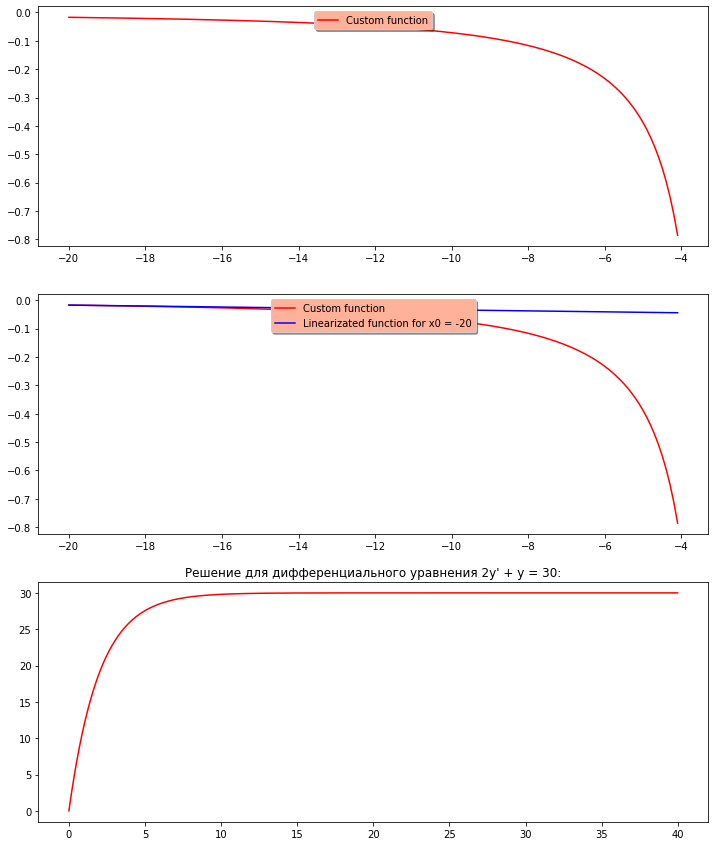

In [63]:
#Функция линеаризации
line_f = lambda x: 7 / (12 + x - x ** 2)

fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=3, ncols=1,                   
    figsize=(12, 15)                    
)

x_list = list(np.arange(-20, -4, 0.1)) #изменено
y_list = [line_f(x) for x in x_list]

ax1.plot (x_list, y_list, 'r')                                                                                          
lgnd1 = ax1.legend(['Custom function'], loc='upper center', shadow=True)    
lgnd1.get_frame().set_facecolor('#ffb19a')

linearizated_function, x0 = teylor_linearization(line_f, x0=random.randint(-20, -4)) #изменено              
y_linear = [linearizated_function(x) for x in x_list]
ax2.plot(x_list, y_list, 'r', x_list, y_linear, 'b', linestyle='solid')               
lgnd2 = ax2.legend(['Custom function', f'Linearizated function for x0 = {x0}'], loc='upper center', shadow=True)
lgnd2.get_frame().set_facecolor('#ffb19a')

x_list = list(np.arange(0, 40, 0.01))
y_list = deriv_function(6)
ax3.plot(x_list, y_list, 'r', linestyle='solid')
ax3.set_title(f"Решение для дифференциального уравнения 2у' + y = {5*6}:")
